# On modelling optimization problems via Julia JuMP

## Prof. Mayron César O. Moreira 

**Universidade Federal de Lavras (UFLA)**  
**Department of Computer Science**  
**Lavras, Minas Gerais, Brazil**  

*Università degli Studi di Modena e Reggio Emilia (UNIMORE)*  
*Reggio Emilia, Italy*

## JuMP: Julia for Mathematical Programming

### Problem 1: The *LegoPlus* production planning

* This example was extracted from ["Cochran, J. J. (2015). Extending "Lego My Simplex." INFORMS Transactions on Education, 15(3), 224–231."](https://pubsonline.informs.org/doi/abs/10.1287/ited.2015.0139 "Cochran (2015): \"Lego My Simplex\"")

The company LegoPlus is an expert in the production of tables and chairs composed of Lego pieces. The LegoPlus works with the following types of raw materials: a piece of 2x2 dimensions (small one) and another one with 2x4 dimensions. To build a table, we need two small pieces and two big ones. On the other hand, to construct a cair, we need two small pieces and a big one. The Figures above illustrate these data (Cochran, 2015).

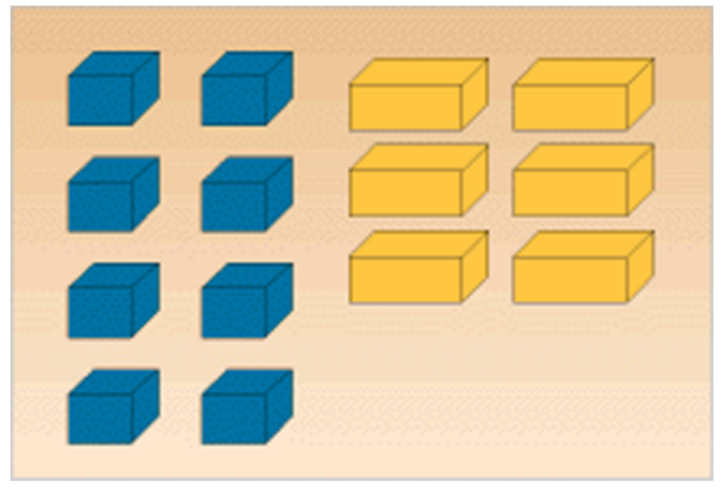

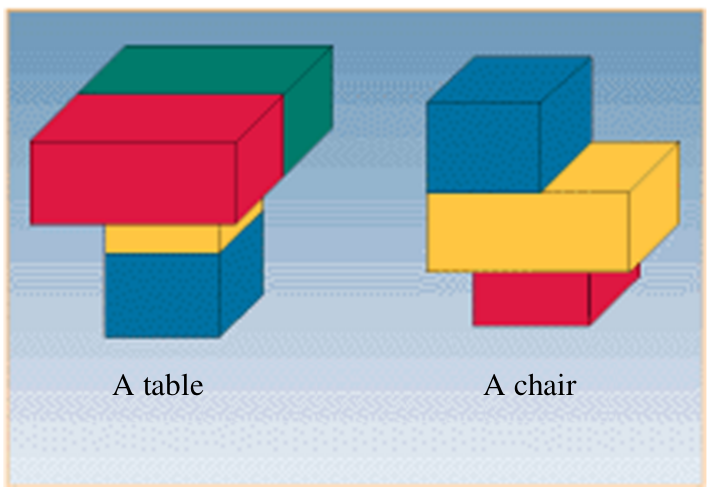

In [1]:
display("image/png", read("images/Lego1.png"))
display("image/png", read("images/Lego2.png"))

Note that we have at most six big pieces available, and a limit of 8 small pieces. The cost of each small piece is $\$3$, while a big one costs $\$5$. Taking that a table and a chair are sold by $\$32$ and $\$21$, respectively, what is the number of chairs and tables LegoPlus must produce to **maximize the profit** of the company?

#### Mathematical modeling

* **Parameters**
    * Cost of a small piece: $\$3$;  
    * Cost of a big piece: $\$5$;  
    * Price of a table: $\$32$;
    * Price of a chair:  $\$21$;
    * Profit of a table: $\$16$;
    * Profit of a chair: $\$10$.


* **Variables**
    * $x \ge 0$: number of tables sold;
    * $y \ge 0$: number of chairs sold.
    
Now, we will present the mathematical model for this problem, and a suggestion of implementation using Julia JuMP.

* **Libraries**

In [2]:
using JuMP, Clp

* **Building a model object**

In [3]:
model = Model(with_optimizer(Clp.Optimizer)) # If you use Gurobi, you´d write Gurobi.Optimizer

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: SolverName() attribute not implemented by the optimizer.

* **Variables**
    * $x \ge 0$: number of tables sold;
    * $y \ge 0$: number of chairs sold.

In [4]:
@variable(model, x >= 0) # We assume that x is real
@variable(model, y >= 0) # We assume that y is real

y

* **Objective function**: maximize the profit.

\begin{equation}
\max f(x,y) = 16x + 10y
\end{equation}

In [5]:
@objective(model, Max, 16*x + 10*y)

16 x + 10 y

* **Constraint 1**: we must respect the number of small pieces available.

\begin{equation}
2x + 2y \le 8
\end{equation}

In [6]:
@constraint(model, cstrSP, 2*x + 2*y <= 8)

cstrSP : 2 x + 2 y <= 8.0

* **Constraint 2**: we must respect the number of big pieces available.

\begin{equation}
2x + y \le 6
\end{equation}

In [7]:
@constraint(model, cstrBP, 2x + y <= 6)

cstrBP : 2 x + y <= 6.0

* **Optmize it!**

In [8]:
start = time()
optimize!(model)
println("Time spent: $(time()-start)s")

Time spent: 11.796000003814697s
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj -0 Dual inf 26 (2)
Clp0006I 2  Obj 52
Clp0000I Optimal - objective value 52
Clp0032I Optimal objective 52 - 2 iterations time 0.042


* **Printing the solution**

In [9]:
println("Objective function = ", objective_value(model))
println("x = ", value(x))
println("y = ", value(y))
println(primal_status(model))
println(dual_status(model))
println(termination_status(model))

Objective function = 52.0
x = 2.0
y = 2.0
FEASIBLE_POINT
FEASIBLE_POINT
OPTIMAL


* **Printing dual variables**

Note that the dual of this problem is:

\begin{equation}
\max f(x,y) = 8\lambda_1 + 6\lambda_2
\end{equation}

sujeito a:

\begin{alignat}{2}
2\lambda_1 + 2\lambda_2 \le -16 && \qquad \\
2\lambda_1 + \lambda_2 \le -10 && \qquad \\
\lambda_1 \le 0, \lambda_2 \le 0 && \qquad
\end{alignat}

The optimal dual variables $\lambda^* = (\lambda_1,\lambda_2)^T = (-6.0, -2.0)$.

In [10]:
println("dual1 = ", dual(cstrBP))
println("dual2 = ", dual(cstrSP))

# See also shadow_price function

dual1 = -6.0
dual2 = -2.0


In the graphic below (*powered by* [Geogebra](https://www.geogebra.org/)), we see the feasible region of this problem, and the optimal point.

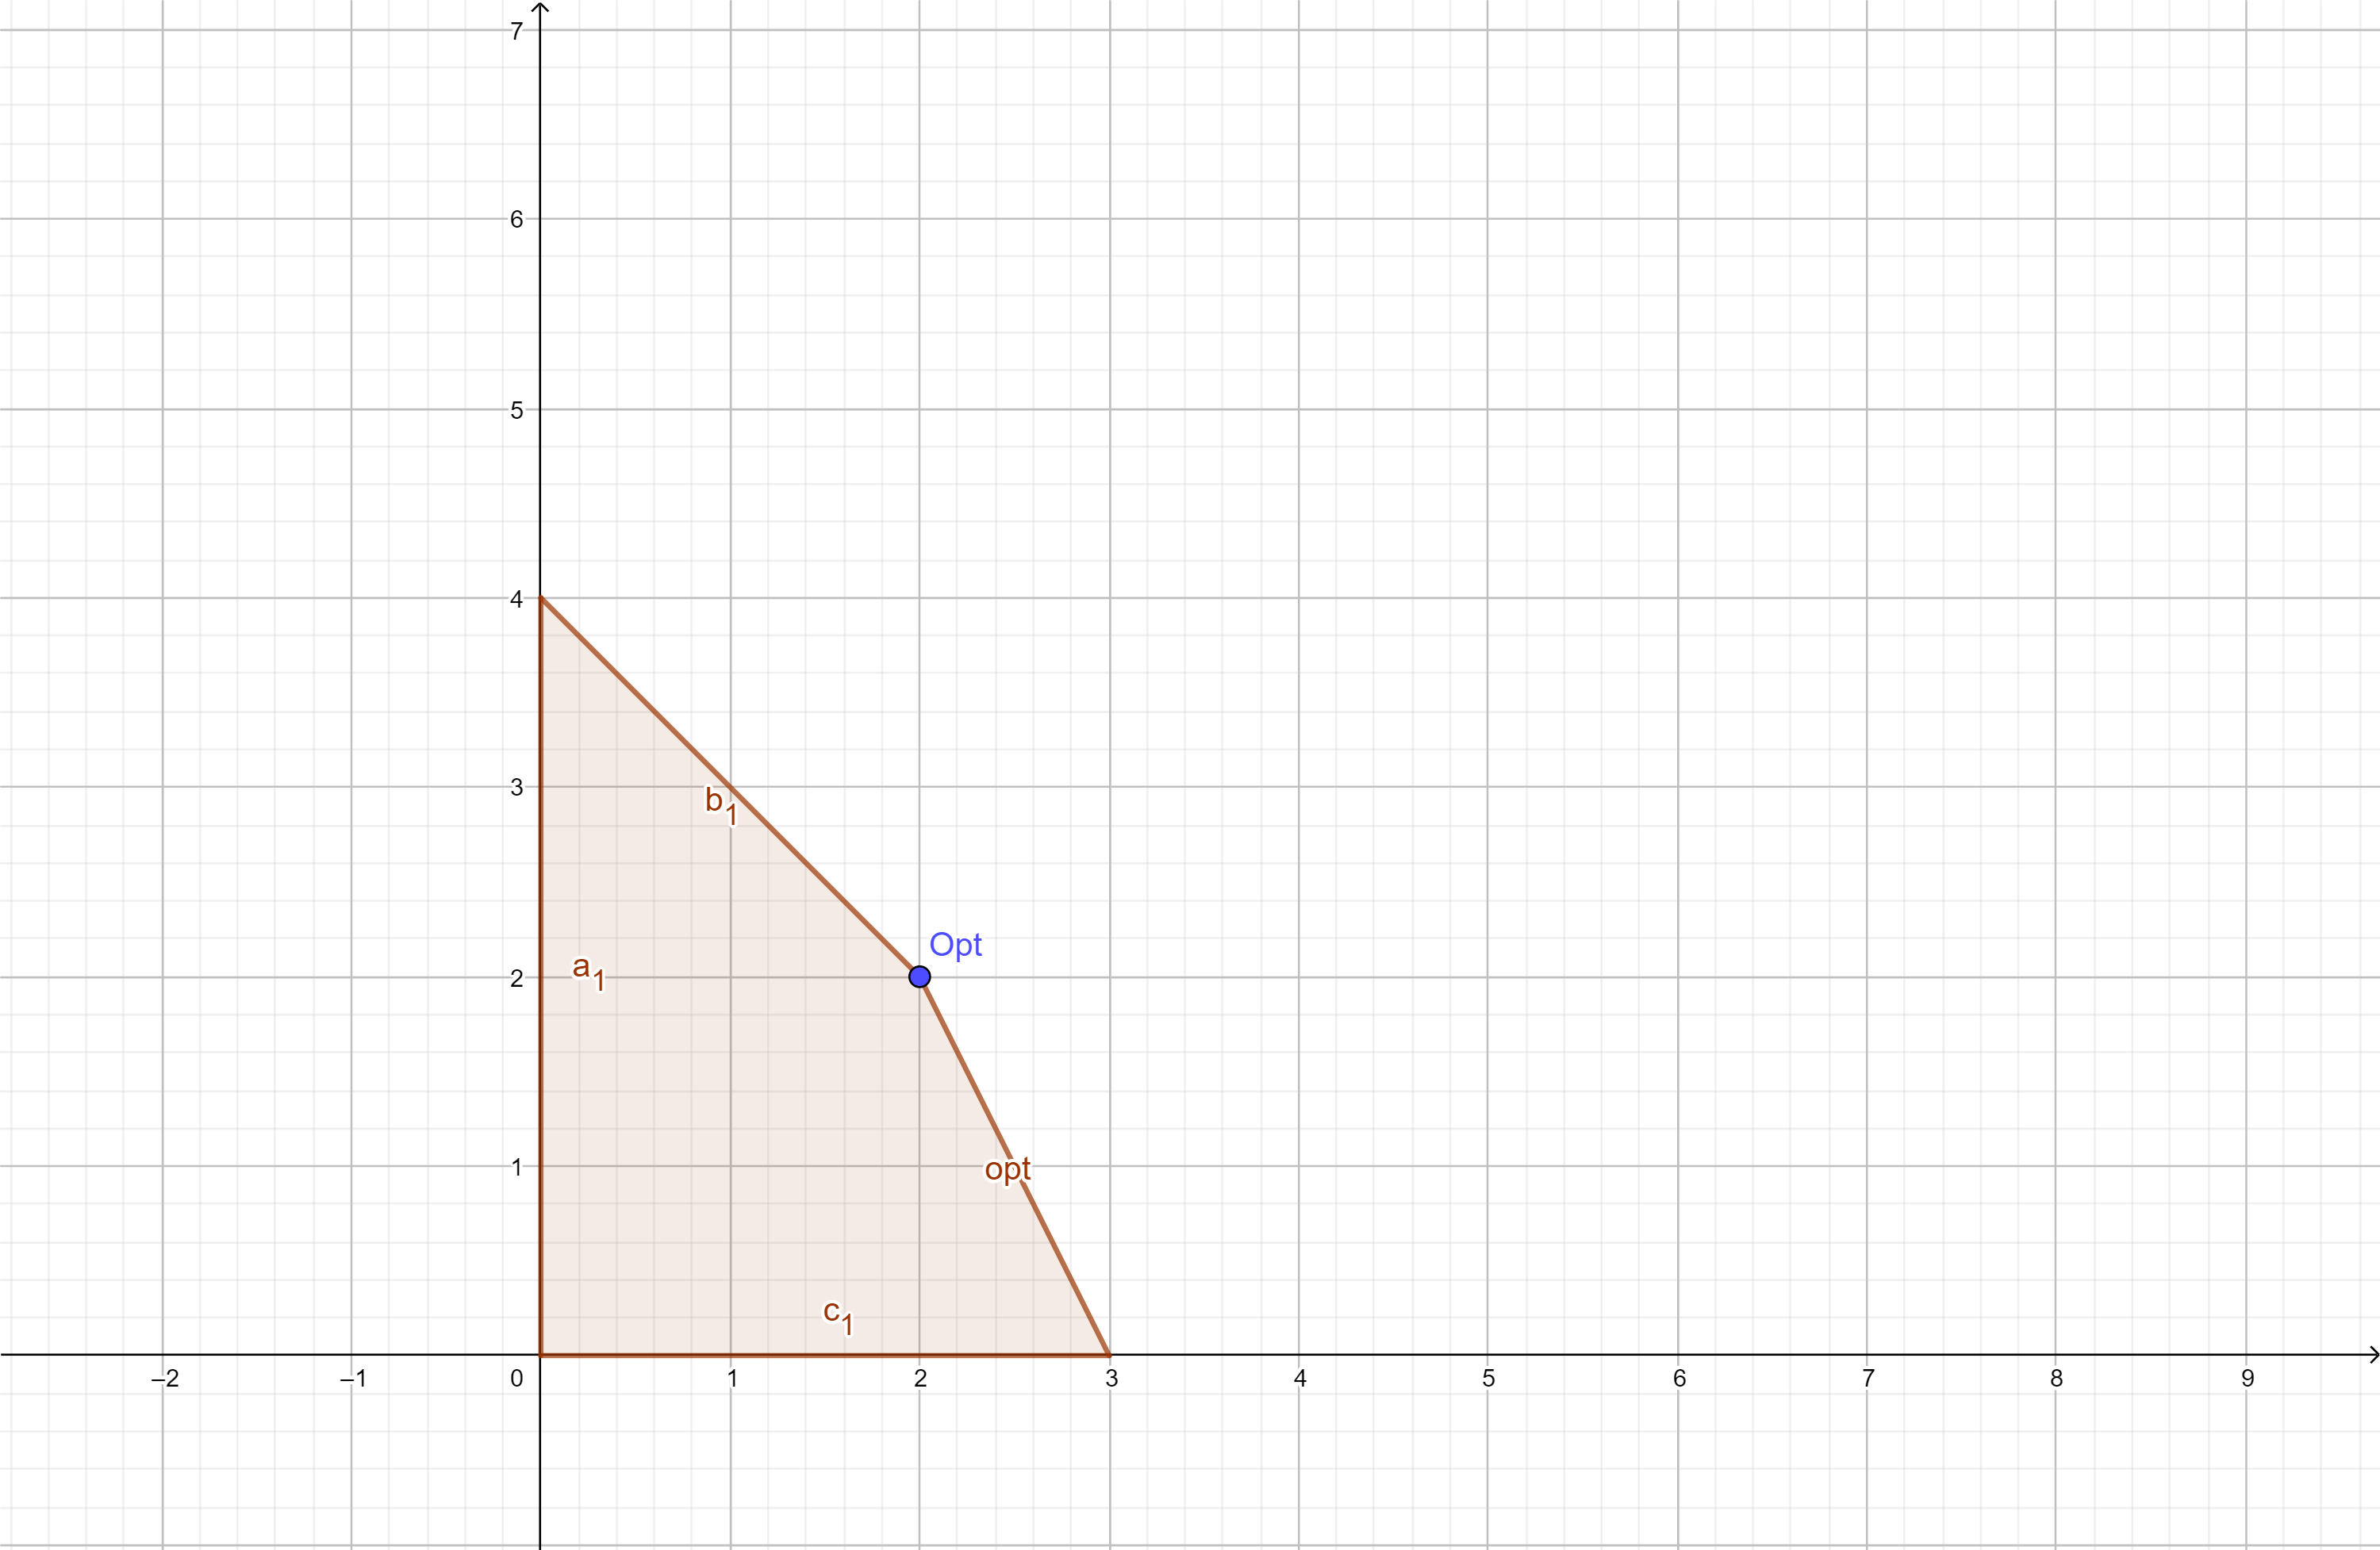

In [11]:
display("image/png", read("images/graphic.png"))